In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("house_prices.csv")

In [6]:
df.head(10)

,surface_m2,n_chambres,n_sdb,annee_construction,quartier,prix_vente
0,114.901425,1,1,1971,D,224113.48
1,95.852071,1,4,2003,D,192102.28
2,119.430656,1,1,1955,D,222503.53
3,145.690896,4,3,1999,E,301411.15
4,92.975399,4,2,1970,A,301053.92
5,92.975891,4,3,1993,B,285055.30
6,147.376384,6,1,2019,C,322245.38
7,123.023042,3,3,1956,A,364959.09
8,85.915768,4,2,1984,B,235147.98
9,116.276801,4,2,2013,D,250264.98


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surface_m2          10000 non-null  float64
 1   n_chambres          10000 non-null  int64  
 2   n_sdb               10000 non-null  int64  
 3   annee_construction  10000 non-null  int64  
 4   quartier            10000 non-null  object 
 5   prix_vente          10000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [8]:
df.describe()

,surface_m2,n_chambres,n_sdb,annee_construction,prix_vente
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,100.044972,3.047900,2.119500,1985.59150,250433.066819
std,29.813665,1.648477,1.185816,20.75809,62260.798767
min,30.000000,1.000000,1.000000,1950.00000,62817.670000
25%,79.822284,2.000000,1.000000,1968.00000,206289.002500
50%,99.922151,3.000000,2.000000,1986.00000,247325.640000
75%,120.132427,4.000000,3.000000,2003.00000,289800.295000
max,217.787131,8.000000,5.000000,2021.00000,521199.630000


<Axes: >

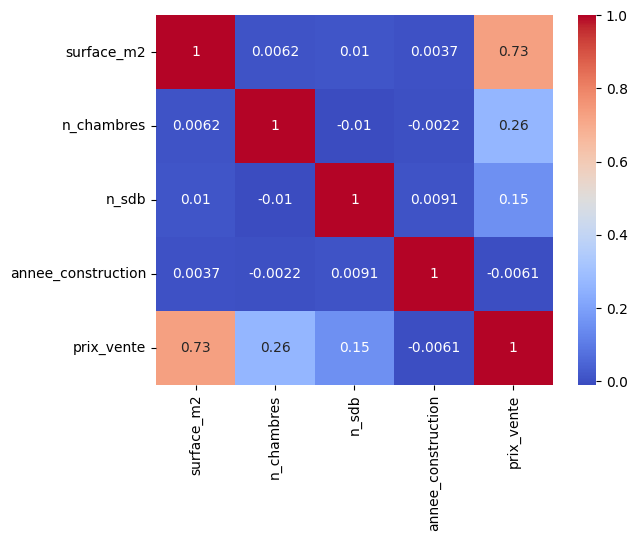

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

x = df.drop("prix_vente", axis=1)
y = df["prix_vente"]

In [16]:
x.head()

,surface_m2,n_chambres,n_sdb,annee_construction,quartier
0,114.901425,1,1,1971,D
1,95.852071,1,4,2003,D
2,119.430656,1,1,1955,D
3,145.690896,4,3,1999,E
4,92.975399,4,2,1970,A


In [17]:
y.head()

0    224113.48
1    192102.28
2    222503.53
3    301411.15
4    301053.92
Name: prix_vente, dtype: float64

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ["surface_m2",'n_chambres','n_sdb','annee_construction']
categorical_features = ['quartier']

preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(), numeric_features),
    ('cat',OneHotEncoder(),categorical_features)
])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [42]:
x_train.shape

(8000, 5)

In [43]:
x_test.shape

(2000, 5)


Régression Linéaire
MAE : 16792.33
RMSE : 21016.28
R2 : 0.89


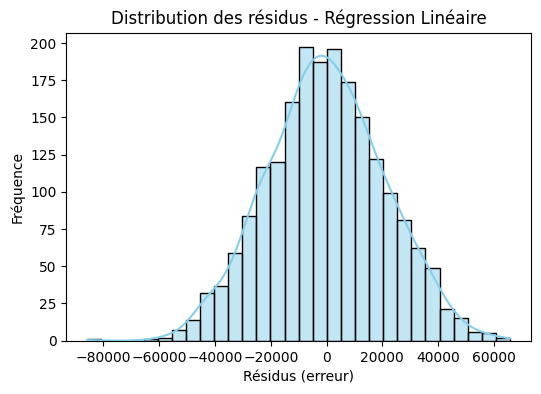

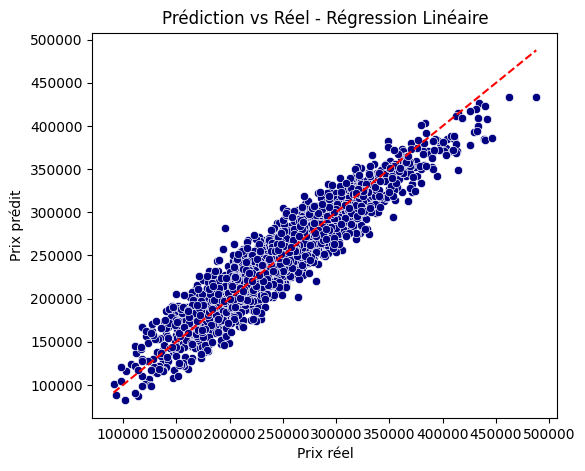


Ridge (alpha=1.0)
MAE : 16791.54
RMSE : 21015.64
R2 : 0.89


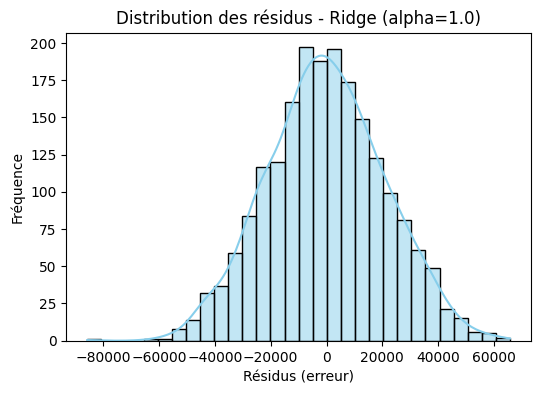

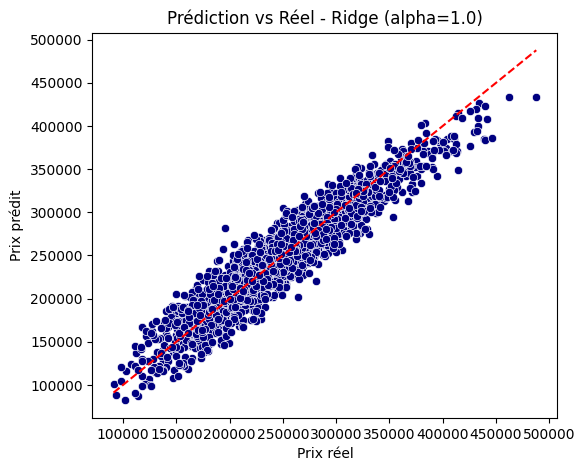

c:\Users\crede\Downloads\python\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+10, tolerance: 3.107e+09
  model = cd_fast.enet_coordinate_descent(



Lasso (alpha=0.1)
MAE : 16792.32
RMSE : 21016.26
R2 : 0.89


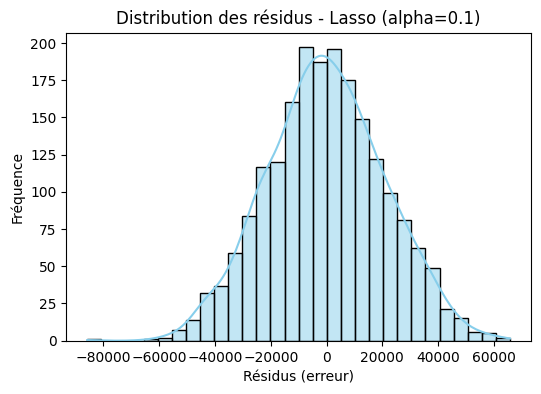

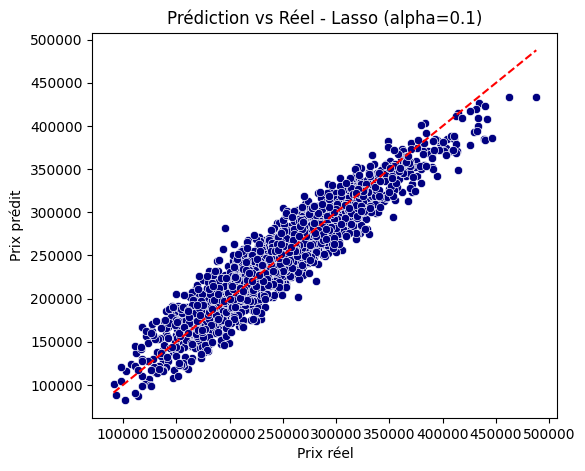


ElasticNet (alpha=0.1 , l1_ratio=0.5)
MAE : 17435.38
RMSE : 21902.38
R2 : 0.88


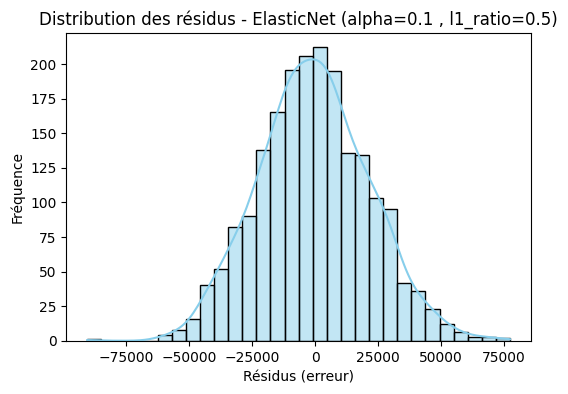

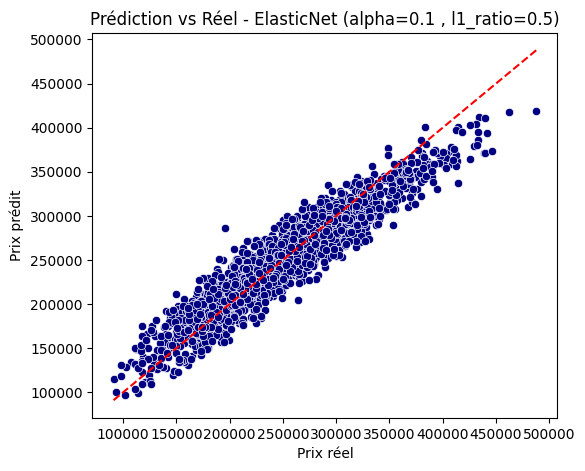


Random Forest (200 arbres)
MAE : 17124.69
RMSE : 21399.35
R2 : 0.88


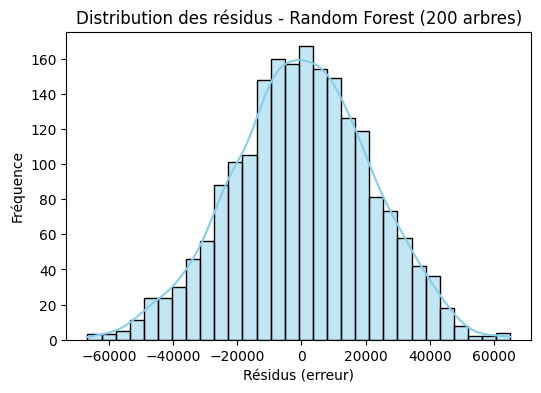

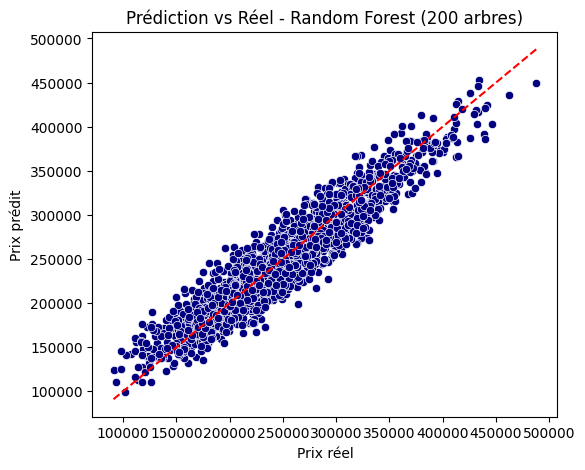

In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models = {
    "Régression Linéaire": LinearRegression(),
    "Ridge (alpha=1.0)": Ridge(alpha=1.0),
    "Lasso (alpha=0.1)" : Lasso(alpha=0.1),
    "ElasticNet (alpha=0.1 , l1_ratio=0.5)": ElasticNet(alpha=0.1 , l1_ratio=0.5),
    "Random Forest (200 arbres)": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
}

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[('preproc', preprocessor), ('model', model)])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name}")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R2 : {r2:.2f}")
    
    # Tracé de la distribution des résidus
    plt.figure(figsize=(6, 4))
    residus = y_test - y_pred
    sns.histplot(residus, kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution des résidus - {name}")
    plt.xlabel("Résidus (erreur)")
    plt.ylabel("Fréquence")
    plt.show()
    
    # Tracé prédiction vs réalité
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test, y=y_pred, color='navy')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Prix réel")
    plt.ylabel("Prix prédit")
    plt.title(f"Prédiction vs Réel - {name}")
    plt.show()
    
    # Enregistrement des résultats
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })
